In [ ]:
import numpy as np

# Specify the dimensions of the 2D array
rows = 4
cols = 4

# Create a random 2D array
random_2d_array = np.random.rand(rows, cols)

# Print the result
print(random_2d_array)
empty_array = np.zeros_like(random_2d_array)
padded_array = np.pad(random_2d_array, pad_width=1, mode='constant', constant_values=0)
print(padded_array)

filt = np.random.rand(3, 3)

filtX,filtY = filt.shape # check to generalize filter

#filt.fill(0)
r=int((filtX-1)/2)
r1=int((filtY-1)/2)
print("r=",r)
print("r1=",r1)

rows, cols = random_2d_array.shape
rows = rows +1
cols = cols +1 
for i in range(1,rows):
    for j in range(1,cols):
    # consider adding average if value is fucked
        box_around_point = padded_array[i-1:i+2, j-1:j+2]
        box_around_point = box_around_point * filt
      #  non_zero_values = box_around_point[box_around_point != 0]
        average_non_zero = np.mean(box_around_point)
        empty_array[i-1,j-1] = average_non_zero
        print(i,j)
        print(box_around_point)
        print(average_non_zero)



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from util import *
from hw1 import *
from hw1_reference import * # delete me TODO 
image  = load_image('data/69015.jpg')
us_image = bilinear_upsampling(image, upsample_factor = 2)

plt.figure(); plt.imshow(image)
plt.figure(); plt.imshow(us_image)
plt.show()

1 1
cords time 
0 1
1 2
cords time 
-1 0


ZeroDivisionError: division by zero

In [ ]:
import numpy as np

def convolution(input_array, kernel):
    input_height, input_width = input_array.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the output size
    output_height = input_height - kernel_height + 1
    output_width = input_width - kernel_width + 1

    # Initialize the output array
    output_array = np.zeros((output_height, output_width))

    # Perform convolution
    for i in range(output_height):
        for j in range(output_width):
            # Extract the region from the input array
            input_region = input_array[i:i + kernel_height, j:j + kernel_width]

            # Compute the dot product with the kernel
            output_array[i, j] = np.sum(input_region * kernel)

    return output_array

# Example usage
input_array = np.array([[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9]])

kernel = np.array([[1, 0],
                   [0, -1]])

result = convolution(input_array, kernel)
print(result)


(481, 321)
(241, 161)


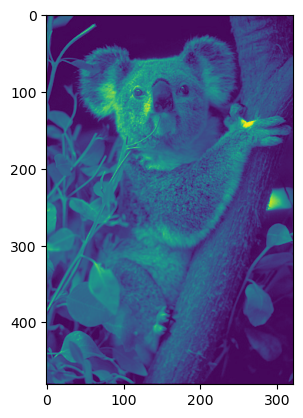

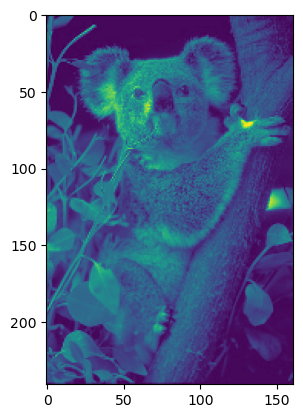

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from util import *
from hw1 import *
from hw1_reference import * # delete me TODO 
image  = load_image('data/69015.jpg')
ds_image = smooth_and_downsample(image, downsample_factor = 2)

plt.figure(); plt.imshow(image)
plt.figure(); plt.imshow(ds_image)
plt.show()

In [2]:
import numpy as np


def mirror_border(image, wx = 1, wy = 1):
   assert image.ndim == 2, 'image should be grayscale'
   sx, sy = image.shape
   # mirror top/bottom
   top    = image[:wx:,:]
   bottom = image[(sx-wx):,:]
   img = np.concatenate( \
      (top[::-1,:], image, bottom[::-1,:]), \
      axis=0 \
   )
   # mirror left/right
   left  = img[:,:wy]
   right = img[:,(sy-wy):]
   img = np.concatenate( \
      (left[:,::-1], img, right[:,::-1]), \
      axis=1 \
   )
   return img

def trim_border(image, wx = 1, wy = 1):
   assert image.ndim == 2, 'image should be grayscale'
   sx, sy = image.shape
   img = np.copy(image[wx:(sx-wx),wy:(sy-wy)])
   return img

def sobelaaa_gradients(image):
   ##########################################################################
   cB = np.array([1, 0, -1])
   cA = np.array([1, 2, 1])


   # Initialize result matrices
   rows, cols = image.shape
   pad = mirror_border(image)
   Gx_result = np.zeros_like(pad) #TODO need to strip these down later
   Gy_result = np.zeros_like(image)
   # Perform manual convolution for Gx

   # TODO can probably figure out how to do only 2 loops for calculations
   for i in range(1,rows+1): 
      for j in range(1,cols+1):
       #  print(pad)
         box_around_point = pad[i,j-1:j+2] # check these boarders
         
         Gx_result[i, j] = np.sum(cB * box_around_point)
       #  print(box_around_point)
       #  print(Gx_result[i, j])
       #  return(Gx_result,Gy_result)

   #print(Gx_result)
   for i in range(1,rows+1): 
      for j in range(1,cols+1):
       #  print(pad)
         box_around_point = Gx_result[i-1:i+2,j] # check these boarders
         
         Gx_result[i, j] = np.sum(cA * box_around_point) # might be applying to wrong order here 

   Gx_result = trim_border(Gx_result)
   if Gx_result.shape != image.shape:
      raise
   return(Gx_result,Gy_result)




ones_array = np.ones((25, 25))

#print(ones_array)


sobelaaa_gradients(ones_array)

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [3]:
def perpendicular_line_points(x, y, point, direction):
    # Generate grid coordinates
   # grid_x, grid_y = np.meshgrid(np.arange(x), np.arange(y), indexing='ij')

    # Calculate perpendicular direction
    perpendicular_theta = (direction + np.pi/2) % (2*np.pi)

    # Parametric equation of the line
    t = np.linspace(0, max(x, y), max(x, y))  # Adjust the range based on the grid size
    line_x = point[0] + t * np.cos(perpendicular_theta)
    line_y = point[1] + t * np.sin(perpendicular_theta)

    # Round to nearest integers to get grid indices
    line_x_indices = np.round(line_x).astype(int)
    line_y_indices = np.round(line_y).astype(int)

    # Filter out-of-bounds indices
    valid_indices = (line_x_indices >= 0) & (line_x_indices < x) & (line_y_indices >= 0) & (line_y_indices < y)

    # Return the points on the line within the grid bounds
    return list(zip(line_x_indices[valid_indices], line_y_indices[valid_indices]))


grid_size = (10, 10)
point_coordinates = (4, 5)
direction_angle = np.pi/4  # Replace with your edge direction in radians

perpendicular_points = perpendicular_line_points(grid_size[0], grid_size[1], point_coordinates, direction_angle)
perpendicular_points

[(4, 5), (3, 6), (2, 7), (2, 7), (1, 8), (0, 9)]

In [10]:
rows, cols = np.ones((25, 25)).shape
m = max(rows, cols)

def perpendicular_line_points(point, direction):
    perpendicular_theta = (direction + np.pi/2) % (2*np.pi)
    t = np.linspace(0, m, m) 
    line_x = point[0] + t * np.cos(perpendicular_theta)
    line_y = point[1] + t * np.sin(perpendicular_theta)
    line_x_indices = np.round(line_x).astype(int)
    line_y_indices = np.round(line_y).astype(int)
    valid_indices = (line_x_indices >= 0) & (line_x_indices < rows) & (line_y_indices >= 0) & (line_y_indices < cols)
    for (k,l) in list(zip(line_x_indices[valid_indices], line_y_indices[valid_indices])):
        print(k,l)
        ox = round(np.cos(direction))
        oy = round(np.sin(direction))
        print(ox,oy)
    return list(zip(line_x_indices[valid_indices], line_y_indices[valid_indices]))

grid_size = (10, 10)
point_coordinates = (4, 5)
direction_angle = np.pi  # Replace with your edge direction in radians

perpendicular_points = perpendicular_line_points(point_coordinates, direction_angle)
perpendicular_points

4 5
-1 0
4 4
-1 0
4 3
-1 0
4 2
-1 0
4 1
-1 0
4 0
-1 0


[(4, 5), (4, 4), (4, 3), (4, 2), (4, 1), (4, 0)]

In [43]:
import numpy as np

# Create a random 10x10 matrix with values between 0 and 1
random_matrix = np.random.rand(5, 5)
random_matrix

array([[0.46657531, 0.01368482, 0.88948605, 0.13539447, 0.90737648],
       [0.79842725, 0.21855198, 0.38210529, 0.16288077, 0.46749286],
       [0.7082831 , 0.54805675, 0.11532725, 0.56983388, 0.40281155],
       [0.15906658, 0.90673069, 0.52418983, 0.05993298, 0.53660986],
       [0.53332011, 0.1631444 , 0.57655077, 0.67414122, 0.25077711]])

In [32]:
per = 7 *100 / (random_matrix.shape[0]*random_matrix.shape[1])
upperThreshhold = np.percentile(random_matrix.flatten(), 100-per)
upperThreshhold

0.9998577558803204

In [37]:
per = 200 *100 / (random_matrix.shape[0]*random_matrix.shape[1])
upperThreshhold = np.percentile(random_matrix.flatten(), 100-per)
upperThreshhold
rows, cols = random_matrix.shape

for i in range(rows):
    for j in range(cols):
        if upperThreshhold > random_matrix[i,j]:
            random_matrix[i,j]=0

In [38]:
random_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
print(np.count_nonzero(random_matrix))

200


In [49]:
from hw1 import *
def local_maximum_search(corner_response_map):
    corner_response_map = pad_border(corner_response_map)

    rows, cols = corner_response_map.shape
    corner_response_map_suppressed = np.zeros_like(corner_response_map)
    neighborhood_size = 1
    for i in range(neighborhood_size, rows - neighborhood_size):
        for j in range(neighborhood_size, cols - neighborhood_size):
            center_value = corner_response_map[i, j]
            neighborhood = corner_response_map[i - neighborhood_size:i + neighborhood_size + 1,
                                            j - neighborhood_size:j + neighborhood_size + 1]
            if center_value >= np.max(neighborhood):
                corner_response_map_suppressed[i, j] = center_value

    corner_response_map_suppressed = trim_border(corner_response_map_suppressed)
    return corner_response_map_suppressed

In [50]:
local_maximum_search(random_matrix)

array([[0.        , 0.        , 0.88948605, 0.        , 0.90737648],
       [0.79842725, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.56983388, 0.        ],
       [0.        , 0.90673069, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.67414122, 0.        ]])

In [45]:
random_matrix

array([[0.46657531, 0.01368482, 0.88948605, 0.13539447, 0.90737648],
       [0.79842725, 0.21855198, 0.38210529, 0.16288077, 0.46749286],
       [0.7082831 , 0.54805675, 0.11532725, 0.56983388, 0.40281155],
       [0.15906658, 0.90673069, 0.52418983, 0.05993298, 0.53660986],
       [0.53332011, 0.1631444 , 0.57655077, 0.67414122, 0.25077711]])

In [51]:
for i in range(-1, 2):
    for j in range(-1, 2):
        print(i,j)

-1 -1
-1 0
-1 1
0 -1
0 0
0 1
1 -1
1 0
1 1


In [54]:
random_matrix = np.random.rand(100, 100)
top_left_corner = random_matrix[:10, :10]
dx, dy = sobel_gradients(random_matrix)  
dx

array([[ 0.93238768,  1.45522446,  0.82877061, ..., -1.15398974,
         1.48836876,  0.57039087],
       [ 2.12927083,  0.11118142, -1.63440884, ..., -1.69035178,
         0.75672952,  1.01671801],
       [ 2.03839542,  0.14959065, -2.22666558, ..., -2.84858695,
         0.43717343,  1.39113847],
       ...,
       [-0.24425771, -1.11931457, -0.15108762, ..., -0.34862762,
         1.31046503,  0.59259495],
       [-0.54131639, -1.87803544, -1.1892367 , ...,  1.86073984,
         0.0850973 , -1.57514271],
       [ 0.32031992, -1.76337054, -2.30778948, ...,  3.12883695,
        -1.52674631, -2.81716816]])

In [55]:
dx, dy = sobel_gradients(top_left_corner)  
dx

array([[ 0.93238768,  1.45522446,  0.82877061, -0.13339826, -1.6920125 ,
        -0.95437643,  0.24415572,  1.58056454,  0.16917979, -1.465533  ],
       [ 2.12927083,  0.11118142, -1.63440884,  1.59121498,  1.45147191,
        -1.22461176, -2.07428301,  1.42862665,  1.37658898, -0.65777141],
       [ 2.03839542,  0.14959065, -2.22666558,  1.36677417,  1.89080211,
        -0.41043104, -2.24846668,  0.16885555,  1.17217458, -0.64854947],
       [ 0.87103255,  1.33335896, -0.94808137, -0.39719586, -0.30128202,
         0.30492788, -0.68878867, -0.88303156,  1.21740939, -0.20776955],
       [-0.57107493,  1.026427  , -0.68140663, -1.40486433, -0.04157879,
        -0.20703388, -0.68798882, -0.10500999,  1.1911538 , -0.10041419],
       [-1.1680964 ,  0.75320832, -0.699581  , -1.62411452,  1.67899014,
        -0.47262088, -1.19987254,  1.46635488,  0.28167169, -1.22971592],
       [-0.36712403,  0.48452855, -1.14044303, -0.59291403,  1.94326505,
         0.21225119, -0.09164178,  1.18878618

In [56]:
bl = random_matrix[10:, 10:]
dx, dy = sobel_gradients(bl)  
dx

array([[ 1.42285348,  1.17027759, -0.28114236, ...,  0.93582731,
        -0.42806369, -1.20864508],
       [ 0.06915761, -0.40853623,  0.08791851, ...,  0.05358901,
         0.42568421,  0.59629555],
       [ 0.38818532, -0.66993278, -0.41788167, ..., -0.397005  ,
         0.27678434,  1.05698496],
       ...,
       [ 0.99918901,  0.70237322,  0.45201298, ..., -0.34862762,
         1.31046503,  0.59259495],
       [ 0.93585851,  0.99852773, -0.32216146, ...,  1.86073984,
         0.0850973 , -1.57514271],
       [ 1.83640166,  1.80485466, -0.53742215, ...,  3.12883695,
        -1.52674631, -2.81716816]])

In [60]:
import numpy as np

# Assume 'your_matrix' is your given matrix
# For demonstration, let's create a random 100x100 matrix
your_matrix = np.random.rand(100, 100)

# Given x and y coordinates (adjust these according to your needs)
x = 50
y = 50

# Define parameters
spatial_width = 3  # Width of spatial grid
orientation_bins = 8  # Number of orientation bins

# Calculate spatial cell width
cell_width = spatial_width

# Calculate integer coordinates of the top-left corner of the spatial grid
start_x = int(x - 1.5 * cell_width)
start_y = int(y - 1.5 * cell_width)

# Extract the spatial grid
spatial_grid = your_matrix[start_x:start_x + spatial_width, start_y:start_y + spatial_width]

# Further, extract an 8x3x3 subarray from the spatial grid
subarray = spatial_grid[:orientation_bins, :]

# Print the resulting subarray
print(spatial_grid)


[[0.93629734 0.50891345 0.98897919]
 [0.26813846 0.33542605 0.82307826]
 [0.50229601 0.04549953 0.84301608]]


In [63]:
import numpy as np

# Assume 'your_matrix' is your given matrix
# For demonstration, let's create a random 100x100 matrix
your_matrix = np.random.rand(100, 100)

# Given x and y coordinates (adjust these according to your needs)
x = 50
y = 50

# Define the size of the box
box_size = 9

# Calculate integer coordinates of the top-left corner of the box
start_x = int(x - box_size // 2)
start_y = int(y - box_size // 2)

# Extract the 9x9 sized box around the given x, y point
box_around_point = your_matrix[start_x:start_x + box_size, start_y:start_y + box_size]

# Print the resulting box
print(box_around_point)
print(box_around_point.shape)


[[0.51919004 0.38951051 0.7249057  0.07403675 0.23826379 0.04453882
  0.64917982 0.74453904 0.91163032]
 [0.35896565 0.76176927 0.42233653 0.19481621 0.12966236 0.0953053
  0.7484499  0.46466159 0.31682452]
 [0.82006048 0.64778558 0.80267195 0.86752964 0.61668553 0.97303158
  0.73708495 0.64677223 0.5781129 ]
 [0.11428767 0.02303422 0.82602235 0.72039715 0.35004595 0.38894877
  0.25065457 0.05658557 0.54702228]
 [0.49229941 0.37231821 0.82213246 0.51518974 0.22452988 0.14111279
  0.56460564 0.09748697 0.74149694]
 [0.40226363 0.20506337 0.21377756 0.00132538 0.17971219 0.85917478
  0.78090878 0.95325314 0.12334862]
 [0.53319784 0.69780658 0.46879523 0.83486781 0.99291363 0.39743241
  0.87195536 0.69815499 0.10894872]
 [0.35925176 0.59169379 0.2096734  0.03053058 0.62308188 0.98094931
  0.94749763 0.0795762  0.74645278]
 [0.24287243 0.72045669 0.48929068 0.7956325  0.0827477  0.55733059
  0.34076107 0.79902053 0.83650639]]
(9, 9)


In [65]:
import numpy as np

# Assume 'box_9x9' is your 9x9 sized box
# For demonstration, let's create a random 9x9 box
box_9x9 = np.random.rand(9, 9)

# Define parameters
spatial_width = 3  # Width of spatial grid
orientation_bins = 8  # Number of orientation bins

# Initialize the feature vector
feature_vector = np.zeros(spatial_width * spatial_width * orientation_bins)

# Iterate over spatial cells
for i in range(spatial_width):
    for j in range(spatial_width):
        # Extract the current 3x3 spatial cell
        spatial_cell = box_9x9[i:i+3, j:j+3]

        # Calculate the orientation energy within the current cell (placeholder values used)
        orientation_energy = np.random.rand(orientation_bins)

        # Store the orientation energy in the feature vector
        start_idx = (i * spatial_width + j) * orientation_bins
        end_idx = start_idx + orientation_bins
        feature_vector[start_idx:end_idx] = orientation_energy

# Print the resulting feature vector
print(feature_vector)


[0.57179218 0.99179564 0.97326827 0.80810644 0.12159702 0.89681638
 0.49994516 0.46338218 0.40509588 0.6465946  0.08534504 0.82159052
 0.20695282 0.57046255 0.10030743 0.70749252 0.89214527 0.40515832
 0.81928794 0.61240013 0.07668316 0.63532544 0.42909239 0.73028133
 0.23184941 0.48553191 0.76527782 0.98535078 0.74128926 0.42022222
 0.50579353 0.56808336 0.66209292 0.09553497 0.0925785  0.92038835
 0.97395192 0.47411588 0.62406518 0.7232725  0.3493675  0.54715489
 0.42278729 0.69705585 0.14122688 0.5795691  0.54583348 0.34891125
 0.92020318 0.8606462  0.1293905  0.9496581  0.3104311  0.53720354
 0.06475303 0.24600372 0.06018258 0.67797393 0.093977   0.59057145
 0.27994083 0.77348014 0.00453577 0.08122268 0.26316043 0.26300098
 0.03095244 0.61789985 0.8962082  0.67538291 0.3267001  0.55088151]


In [66]:
# Define parameters
spatial_width = 3  # Width of spatial grid
orientation_bins = 8  # Number of orientation bins

# Initialize the feature vector
feature_vector = np.random.rand(spatial_width * spatial_width * orientation_bins)

# Reshape the feature vector into an 8x3x3 array
reshaped_array = feature_vector.reshape((orientation_bins, spatial_width, spatial_width))

# Print the resulting 8x3x3 array
print(reshaped_array)

[[[0.3350474  0.73762453 0.20352385]
  [0.13716236 0.21503796 0.11846456]
  [0.03265883 0.86396084 0.40471903]]

 [[0.47238255 0.79498257 0.34492977]
  [0.62206385 0.96954882 0.48504517]
  [0.28555415 0.55044366 0.43987322]]

 [[0.19487677 0.44724751 0.00102998]
  [0.53997343 0.4144484  0.23001915]
  [0.99673188 0.6869836  0.88554056]]

 [[0.6507225  0.07397175 0.52719842]
  [0.12981906 0.98212377 0.5678736 ]
  [0.06224407 0.19230373 0.01839399]]

 [[0.21879323 0.42668164 0.58642756]
  [0.52205749 0.10124856 0.55239991]
  [0.79810051 0.74902078 0.49229549]]

 [[0.52198099 0.36244813 0.23007916]
  [0.9411866  0.76761755 0.08337994]
  [0.9376025  0.95028444 0.08440505]]

 [[0.31692357 0.15881182 0.95412321]
  [0.41207683 0.53516016 0.87744183]
  [0.20768529 0.3361102  0.84374699]]

 [[0.52578428 0.65185773 0.98219464]
  [0.05363484 0.95221386 0.42816772]
  [0.18941547 0.30466266 0.57359476]]]


In [69]:
import numpy as np

# Assume 'box_9x9' is your 9x9 sized box
# For demonstration, let's create a random 9x9 box
box_9x9 = np.random.rand(9, 9)

# Define parameters
spatial_width = 3  # Width of spatial grid
orientation_bins = 8  # Number of orientation bins

# Calculate the center of the box
center_x, center_y = box_9x9.shape[0] // 2, box_9x9.shape[1] // 2

# Throw away the interior 3x3 bin around the center
box_without_center = np.delete(box_9x9, np.s_[center_x - 1:center_x + 2], axis=0)
box_without_center = np.delete(box_without_center, np.s_[center_y - 1:center_y + 2], axis=1)

# Initialize the feature vector
feature_vector = np.zeros(spatial_width * spatial_width * orientation_bins)

# Iterate over remaining 3x3 chunks
for i in range(spatial_width):
    for j in range(spatial_width):
        # Extract the current 3x3 chunk
        chunk = box_without_center[i:i+3, j:j+3]

        # Calculate the orientation energy within the current chunk (placeholder values used)
        orientation_energy = np.random.rand(orientation_bins)

        # Store the orientation energy in the feature vector
        start_idx = (i * spatial_width + j) * orientation_bins
        end_idx = start_idx + orientation_bins
        feature_vector[start_idx:end_idx] = orientation_energy

# Print the resulting feature vector
print(feature_vector)
print(feature_vector.shape)


[0.61267764 0.04321926 0.25078522 0.45066387 0.47253859 0.31857328
 0.92143313 0.70756074 0.81105441 0.19102863 0.0704793  0.30817454
 0.20661433 0.15512297 0.56934978 0.84454641 0.92440266 0.05959644
 0.22015499 0.51700433 0.90404686 0.50531534 0.43539094 0.57217129
 0.61711686 0.83656723 0.71260422 0.97304491 0.24256529 0.54059002
 0.55956871 0.05391512 0.495082   0.37372301 0.99928678 0.42040532
 0.85291126 0.77228415 0.2332256  0.95057867 0.11706314 0.85069326
 0.63566618 0.05294159 0.66694196 0.02592172 0.58063056 0.06162578
 0.41427784 0.81845874 0.73751273 0.94544519 0.54433132 0.93486733
 0.15431737 0.06820673 0.89760768 0.88531265 0.18989805 0.11936106
 0.97628165 0.95219498 0.30942057 0.58048958 0.68969513 0.15552028
 0.60571412 0.73731454 0.29021912 0.2004354  0.78633526 0.62903772]
(72,)


In [81]:
import numpy as np

# Assume 'your_matrix' is your given matrix
# For demonstration, let's create a random 100x100 matrix
your_matrix = np.random.rand(100, 100)

# Given x and y coordinates (adjust these according to your needs)
x = 50
y = 50

# Define the size of the box
box_size = 9

# Calculate integer coordinates of the top-left corner of the box
start_x = int(x - box_size // 2)
start_y = int(y - box_size // 2)

# Extract the 9x9 sized box around the given x, y point
box_around_point = your_matrix[start_x:start_x + box_size, start_y:start_y + box_size]

# Print the resulting box
print(box_around_point)
print(box_around_point.shape)

[[0.83261929 0.15738296 0.10195682 0.89467776 0.48599059 0.71812291
  0.61274352 0.38142529 0.27780765]
 [0.99456201 0.89590759 0.78168578 0.01352864 0.01659996 0.89451641
  0.81296235 0.13351212 0.31664423]
 [0.97843768 0.31715937 0.96366212 0.75860264 0.60046761 0.0322738
  0.9895765  0.84021255 0.63995426]
 [0.17787569 0.91751001 0.5586212  0.03567081 0.12092685 0.2340837
  0.86652483 0.54717903 0.77568418]
 [0.59509908 0.11295968 0.9924418  0.66334305 0.48211032 0.09011248
  0.65362959 0.68524556 0.35829307]
 [0.73884314 0.10195469 0.06382503 0.85487046 0.9152031  0.07272027
  0.72274172 0.49035382 0.94185224]
 [0.28698138 0.49660882 0.46285676 0.25538517 0.62991682 0.22259918
  0.20396152 0.31448605 0.75554458]
 [0.01316972 0.98562798 0.25692453 0.90183825 0.05452059 0.77198439
  0.58721893 0.68920683 0.52383144]
 [0.30980762 0.1819297  0.87633244 0.6898148  0.9996098  0.34903902
  0.55836872 0.29636635 0.68459658]]
(9, 9)


In [85]:
x, y = 1,4 # 1,1, 1,4, 1,7 
        #4,1 4,4 4,7 
# 7,1 7,4 7,7 

box_size = 3

# Calculate integer coordinates of the top-left corner of the box
start_x = int(x - box_size // 2)
start_y = int(y - box_size // 2)

# Extract the 9x9 sized box around the given x, y point
box_around_pointaa = box_around_point[start_x:start_x + box_size, start_y:start_y + box_size]

# Print the resulting box
print(box_around_pointaa)
print(box_around_pointaa.shape)



[[0.89467776 0.48599059 0.71812291]
 [0.01352864 0.01659996 0.89451641]
 [0.75860264 0.60046761 0.0322738 ]]
(3, 3)


In [82]:
box_9x9 = box_around_point

# Define parameters
spatial_width = 3  # Width of spatial grid
orientation_bins = 8  # Number of orientation bins

# Calculate the center of the box
center_x, center_y = box_9x9.shape[0] // 2, box_9x9.shape[1] // 2

# Throw away the interior 3x3 bin around the center
box_without_center = np.delete(box_9x9, np.s_[center_x - 1:center_x + 2], axis=0)
box_without_center = np.delete(box_without_center, np.s_[center_y - 1:center_y + 2], axis=1)

# Initialize the 3D array to store chunks
chunks_array = np.zeros((spatial_width, spatial_width, orientation_bins))

# Iterate over remaining 3x3 chunks
for b in range(8):
    for i in range(spatial_width):
        for j in range(spatial_width):
            # Extract the current 3x3 chunk
            chunk = box_without_center[i:i+3, j:j+3]

            # Calculate the orientation energy within the current chunk (placeholder values used)
        # orientation_energy = np.random.rand(orientation_bins)

            # Store the orientation energy in the 3D array
            chunks_array[i, j, :] = box_without_center[i:i+3, j:j+3] #box_without_center #orientation_energy

# Print the resulting 3D array
print(chunks_array)
print(chunks_array.shape)


ValueError: could not broadcast input array from shape (3,3) into shape (8,)

In [109]:
def values_around_point(matrix, center, distance):
    rows, cols = matrix.shape
    center_x, center_y = center

    values = []

    for i in range(center_x - distance, center_x + distance + 1):
        for j in range(center_y - distance, center_y + distance + 1):
            if (i,j)==center_point:
                continue
            # Check if the coordinates are within bounds
            if 0 <= i < rows and 0 <= j < cols:
                values.append(matrix[i, j])

    return values

matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])

center_point = (1, 2)
distance_around_center = 1

values_around_point(matrix, center_point, distance_around_center)


[2, 3, 4, 6, 8, 10, 11, 12]

In [113]:
scale = 1.0
cell_width = int(scale) * 3
padd_amt = cell_width + (cell_width // 2)
padd_amt

4

In [87]:
import numpy as np
from hw1 import *
#from visualize import * # for debugging
"""
   INTEREST POINT OPERATOR (12 Points Implementation + 3 Points Write-up)

   Implement an interest point operator of your choice.

   Your operator could be:

   (A) The Harris corner detector (Szeliski 7.1.1)

               OR

   (B) The Difference-of-Gaussians (DoG) operator defined in:
       Lowe, "Distinctive Image Features from Scale-Invariant Keypoints", 2004.
       https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf

               OR

   (C) Any of the alternative interest point operators appearing in
       publications referenced in Szeliski or in lecture

              OR

   (D) A custom operator of your own design

   You implementation should return locations of the interest points in the
   form of (x,y) pixel coordinates, as well as a real-valued score for each
   interest point.  Greater scores indicate a stronger detector response.

   In addition, be sure to apply some form of spatial non-maximum suppression
   prior to returning interest points.

   Whichever of these options you choose, there is flexibility in the exact
   implementation, notably in regard to:

   (1) Scale

       At what scale (e.g. over what size of local patch) do you operate?

       You may optionally vary this according to an input scale argument.

       We will test your implementation at the default scale = 1.0, so you
       should make a reasonable choice for how to translate scale value 1.0
       into a size measured in pixels.

   (2) Nonmaximum suppression

       What strategy do you use for nonmaximum suppression?

       A simple (and sufficient) choice is to apply nonmaximum suppression
       over a local region.  In this case, over how large of a local region do
       you suppress?  How does that tie into the scale of your operator?

   For making these, and any other design choices, keep in mind a target of
   obtaining a few hundred interest points on the examples included with
   this assignment, with enough repeatability to have a large number of
   reliable matches between different views.

   If you detect more interest points than the requested maximum (given by
   the max_points argument), return only the max_points highest scoring ones.

   In addition to your implementation, include a brief write-up (in hw2.pdf)
   of your design choices.

   Arguments:
      image       - a grayscale image in the form of a 2D numpy array
      max_points  - maximum number of interest points to return
      scale       - (optional, for your use only) scale factor at which to
                    detect interest points
      mask        - (optional, for your use only) foreground mask constraining
                    the regions to extract interest points
   Returns:
      xs          - numpy array of shape (N,) containing x-coordinates of the
                    N detected interest points (N <= max_points)
      ys          - numpy array of shape (N,) containing y-coordinates
      scores      - numpy array of shape (N,) containing a real-valued
                    measurement of the relative strength of each interest point
                    (e.g. corner detector criterion OR DoG operator magnitude)
"""
def find_interest_points(image, max_points = 200, scale = 1.0, mask = None):
   # check that image is grayscale
   assert image.ndim == 2, 'image should be grayscale'
   ##########################################################################
   # Implement Harris corner detector
   [img_r, img_c] = image.shape

   dx, dy = sobel_gradients(image) # per-pixel gradients

   # Calculate second derivatives 
   # Convolve by applying a Gaussian over scale pixels 
   sigma = scale
   dxdx = denoise_gaussian(dx * dx, sigma = sigma)
   dxdy = denoise_gaussian(dx * dy, sigma = sigma)
   dydy = denoise_gaussian(dy * dy, sigma = sigma)

   # Get candidate corners
   alpha = 0.05 # constant 
   cand_xs = np.array([])
   cand_ys = np.array([])
   Rs = np.zeros((img_r, img_c))
   for y in range(img_r):
      for x in range(img_c):
         if mask is not None and not mask[y,x]:
            continue # don't extract if not in mask 
         Tdxdx = dxdx[y, x]
         Tdxdy = dxdy[y, x]
         Tdydy = dydy[y, x]
         R = Tdxdx * Tdydy - (Tdxdy * Tdxdy) - \
             alpha * (Tdxdx + Tdydy) * (Tdxdx + Tdydy)
         if R > 0: # corner or flat
            Rs[y, x] = R
            cand_xs = np.append(cand_xs, x)
            cand_ys = np.append(cand_ys, y)

   # Nonmaximum suppression
   corners = np.zeros((img_r,img_c))
   scale = int(np.ceil(scale))
   for y, x in zip(cand_ys, cand_xs):
      y = int(y)
      x = int(x)
      miny = max(y - scale, 0)
      minx = max(x - scale, 0)
      maxy = min(y + scale + 1, img_r)
      maxx = min(x + scale + 1, img_c)

      if np.all(np.greater_equal(Rs[y, x], Rs[miny:maxy, minx: maxx])):
         corners[y, x] = Rs[y, x]
   
   # Threshold 
   nz = np.count_nonzero(corners)
   if nz > max_points:
      t = np.percentile(corners[corners != 0], 100 - 100*max_points / nz)
   else: 
      t = 0
   
   (ys, xs) = np.where(corners > t)
   scores = corners[ys, xs]
   ##########################################################################
   return xs, ys, scores

"""
   FEATURE DESCRIPTOR (12 Points Implementation + 3 Points Write-up)

   Implement a SIFT-like feature descriptor by binning orientation energy
   in spatial cells surrounding an interest point.

   Unlike SIFT, you do not need to build-in rotation or scale invariance.

   A reasonable default design is to consider a 3 x 3 spatial grid consisting
   of cell of a set width (see below) surrounding an interest point, marked
   by () in the diagram below.  Using 8 orientation bins, spaced evenly in
   [-pi,pi), yields a feature vector with 3 * 3 * 8 = 72 dimensions.

             ____ ____ ____
            |    |    |    |
            |    |    |    |
            |____|____|____|
            |    |    |    |
            |    | () |    |
            |____|____|____|
            |    |    |    |
            |    |    |    |
            |____|____|____|

                 |----|
                  width

   You will need to decide on a default spatial width.  Optionally, this can
   be a multiple of a scale factor, passed as an argument.  We will only test
   your code by calling it with scale = 1.0.

   In addition to your implementation, include a brief write-up (in hw2.pdf)
   of your design choices.

  Arguments:
      image    - a grayscale image in the form of a 2D numpy
      xs       - numpy array of shape (N,) containing x-coordinates
      ys       - numpy array of shape (N,) containing y-coordinates
      scale    - scale factor

   Returns:
      feats    - a numpy array of shape (N,K), containing K-dimensional
                 feature descriptors at each of the N input locations
                 (using the default scheme suggested above, K = 72)
"""
def extract_features(image, xs, ys, scale = 1.0):
   # check that image is grayscale
   assert image.ndim == 2, 'image should be grayscale'
   ##########################################################################
   nbins = 8
   grid_len = 3
   gradient_threshold = 0.2 # fraction of the sum of the gradients

   N = len(xs)
   K = grid_len * grid_len * nbins
   hist_bin_edges = np.linspace(-np.pi, np.pi, nbins + 1)

   # Need odd scale 
   if scale % 2 == 0:
      scale += 1

   cell_width = int(scale) * 3
   padd_amt = cell_width + (cell_width // 2)
   padded_image = mirror_border(image, wx = padd_amt, wy = padd_amt)

   # Apply a small blur to smooth out noise 
   simage = denoise_gaussian(padded_image, sigma = scale)
   dx, dy = sobel_gradients(simage) # per-pixel gradients
   grad_mag = linalg.norm(np.dstack((dx, dy)), axis = 2)
   theta = np.arctan2(dy, dx) # output in range [-pi, pi]


   feats = np.zeros((N, K))
   for pt_num, (y, x) in enumerate(zip(ys, xs)):
         # change to padded image coordinates
         py = int(y) + padd_amt
         px = int(x) + padd_amt
         # calculate window bounds
         miny = py - padd_amt
         minx = px - padd_amt
         # max is non-inclusive 
         maxy = py + padd_amt + 1
         maxx = px + padd_amt + 1
         # size is (cell_width * 3, cell_width * 3) 
         window_thetas = theta[miny: maxy, minx: maxx]
         window_grad_mag = grad_mag[miny: maxy, minx: maxx]

         # split window thetas/gradient magnitudes into 3 rows
         window_theta_rows = np.vsplit(window_thetas,3)
         window_grad_mag_rows = np.vsplit(window_grad_mag, 3)

         # get interest point histograms at each grid position
         interest_pt_hists = np.array([])
         for i in range(grid_len):
            col_thetas = np.hsplit(window_theta_rows[i], 3)
            col_grad_mag = np.hsplit(window_grad_mag_rows[i],3)

            for j in range(grid_len):
               cell_thetas = col_thetas[j]
               cell_grad_mag = col_grad_mag[j]

               # clamp excessively high gradients
               grad_sum = np.sum(cell_grad_mag)
               thresh = gradient_threshold * grad_sum
               cell_grad_mag[cell_grad_mag > thresh] = thresh

               # get histogram (normalizes integral to 1)
               h, _ = np.histogram(cell_thetas, bins = hist_bin_edges, weights = cell_grad_mag, density = True)
               interest_pt_hists = np.append(interest_pt_hists, h)

         # Assign feature descriptors for interest point
         feats[pt_num,:] = interest_pt_hists

   ##########################################################################
   return feats


"""
   FEATURE MATCHING (7 Points Implementation + 3 Points Write-up)

   Given two sets of feature descriptors, extracted from two different images,
   compute the best matching feature in the second set for each feature in the
   first set.

   Matching need not be (and generally will not be) one-to-one or symmetric.
   Calling this function with the order of the feature sets swapped may
   result in different returned correspondences.

   For each match, also return a real-valued score indicating the quality of
   the match.  This score could be based on a distance ratio test, in order
   to quantify distinctiveness of the closest match in relation to the second
   closest match.  It could optionally also incorporate scores of the interest
   points at which the matched features were extracted.  You are free to
   design your own criterion.

   In addition to your implementation, include a brief write-up (in hw2.pdf)
   of your design choices.

   Arguments:
      feats0   - a numpy array of shape (N0, K), containing N0 K-dimensional
                 feature descriptors (generated via extract_features())
      feats1   - a numpy array of shape (N1, K), containing N1 K-dimensional
                 feature descriptors (generated via extract_features())
      scores0  - a numpy array of shape (N0,) containing the scores for the
                 interest point locations at which feats0 was extracted
                 (generated via find_interest_point())
      scores1  - a numpy array of shape (N1,) containing the scores for the
                 interest point locations at which feats1 was extracted
                 (generated via find_interest_point())

   Returns:
      matches  - a numpy array of shape (N0,) containing, for each feature
                 in feats0, the index of the best matching feature in feats1
      scores   - a numpy array of shape (N0,) containing a real-valued score
                 for each match
"""
def match_features(feats0, feats1, scores0, scores1):
   ##########################################################################
   N0 = len(feats0)
   N1 = len(feats1)
   nbins = len(feats0[0,:])
   matches = np.zeros((N0,), dtype = int)
   scores = np.zeros((N0,))


   for i in range(N0):
      feat = feats0[i,:]
      # Use a Chi-Square Two Sample test to compute feature distances
      # see https://www.itl.nist.gov/div898/software/dataplot/refman1/auxillar/chi2samp.htm
      rep_feat = np.repeat(feat.reshape(1,-1), N1, axis = 0)
      sums_feat = np.sum(rep_feat, axis = 1)
      sums_feats1 = np.sum(feats1, axis = 1)
      # scaling constants
      K1 = np.sqrt(sums_feats1 / sums_feat)
      K1_m = np.repeat(K1.reshape(-1,1), nbins, axis = 1)
      K2 = np.sqrt(sums_feat / sums_feats1)
      K2_m = np.repeat(K2.reshape(-1,1), nbins, axis = 1)
      # terms 
      feat_sum = rep_feat + feats1
      feat_sqr_diff = np.square(K1_m * rep_feat - K2_m * feats1)

      # Calculate quotient 
      quot = np.divide(feat_sqr_diff, feat_sum, \
                       out = np.zeros_like(feat_sum), where = feat_sum != 0)
      distances = np.sum(quot, axis = 1)

      idcs = np.argsort(distances)

      matches[i] = idcs[0]
      # compute nndr between closest and second closest point 
      nndr = distances[idcs[0]] / distances[idcs[1]]
      scores[i] = 1 / nndr
   ##########################################################################
   return matches, scores

"""
   HOUGH TRANSFORM (7 Points Implementation + 3 Points Write-up)

   Assuming two images of the same scene are related primarily by
   translational motion, use a predicted feature correspondence to
   estimate the overall translation vector t = [tx ty].

   Your implementation should use a Hough transform that tallies votes for
   translation parameters.  Each pair of matched features votes with some
   weight dependant on the confidence of the match; you may want to use your
   estimated scores to determine the weight.

   In order to accumulate votes, you will need to decide how to discretize the
   translation parameter space into bins.

   In addition to your implementation, include a brief write-up (in hw2.pdf)
   of your design choices.

   Arguments:
      xs0     - numpy array of shape (N0,) containing x-coordinates of the
                interest points for features in the first image
      ys0     - numpy array of shape (N0,) containing y-coordinates of the
                interest points for features in the first image
      xs1     - numpy array of shape (N1,) containing x-coordinates of the
                interest points for features in the second image
      ys1     - numpy array of shape (N1,) containing y-coordinates of the
                interest points for features in the second image
      matches - a numpy array of shape (N0,) containing, for each feature in
                the first image, the index of the best match in the second
      scores  - a numpy array of shape (N0,) containing a real-valued score
                for each pair of matched features

   Returns:
      tx      - predicted translation in x-direction between images
      ty      - predicted translation in y-direction between images
      max_votes - the max value in the matrix storing vote tallies;
                  this output is provided for your own convenience and 
                  you are free to design its format
"""
def hough_votes(xs0, ys0, xs1, ys1, matches, scores):
   ##########################################################################
   # find translation from image 0 to image 1 
   N0 = len(xs0)

   tx_bins = 20
   ty_bins = 20
   # Store translation vectors between interest points 
   txs = np.zeros(N0)
   tys = np.zeros(N0)

   for i in range(N0):
      j = matches[i]
      txs[i] = xs1[j] - xs0[i]
      tys[i] = ys1[j] - ys0[i]

   min_tx = txs.min()
   max_tx = txs.max()

   min_ty = tys.min()
   max_ty = tys.max()

   tx_edges, _ = np.linspace(min_tx, max_tx, tx_bins, endpoint = False, retstep = True) 
   ty_edges, _ = np.linspace(min_ty, max_ty, ty_bins, endpoint = False, retstep = True)
   
   # tally votes
   votes = np.zeros((ty_bins, tx_bins))
   for i in range(N0):
      j = matches[i]
      # take min with bins - 1 in case the value equals the maximum
      tx_bin = max(np.where(txs[i] >= tx_edges)[0])
      ty_bin = max(np.where(tys[i] >= ty_edges)[0])
      votes[ty_bin, tx_bin] += scores[i]

   # find best tx and ty
   tyi, txi = np.unravel_index(np.argmax(votes), votes.shape)
   ty = ty_edges[tyi]
   tx = tx_edges[txi]
   max_votes = np.max(votes)
   ##########################################################################
   return tx, ty, max_votes

"""
    OBJECT DETECTION (10 Points Implementation + 5 Points Write-up)

    Implement an object detection system which, given multiple object
    templates, localizes the object in the input (test) image by feature
    matching and hough voting.

    The first step is to match features between template images and test image.
    To prevent noisy matching from background, the template features should
    only be extracted from foreground regions.  The dense point-wise matching
    is then used to compute a bounding box by hough voting, where box center is
    derived from voting output and the box shape is simply the size of the
    template image.

    To detect potential objects with diversified shapes and scales, we provide
    multiple templates as input.  To further improve the performance and
    robustness, you are also REQUIRED to implement a multi-scale strategy
    either:
       (a) Implement multi-scale interest points and feature descriptors OR
       (b) Repeat a single-scale detection procedure over multiple image scales
           by resizing images.

    In addition to your implementation, include a brief write-up (in hw2.pdf)
    of your design choices on multi-scale implementaion and samples of
    detection results (please refer to display_bbox() function in visualize.py).

    Arguments:
        template_images - a list of gray scale images.  Each image is in the
                          form of a 2d numpy array which is cropped to tightly
                          cover the object.

        template_masks  - a list of binary masks having the same shape as the
                          template_image.  Each mask is in the form of 2d numpy
                          array specyfing the foreground mask of object in the
                          corresponding template image.

        test_img        - a gray scale test image in the form of 2d numpy array
                          containing the object category of interest.

    Returns:
         bbox           - a numpy array of shape (4,) specifying the detected
                          bounding box in the format of
                             (x_min, y_min, x_max, y_max)

"""
def object_detection(template_images, template_masks, test_img):
   ##########################################################################
   # hyperparameters for finding interest points
   max_points = 100
   N_temp = len(template_images)
   # allow for more interest points from main image since object isn't cropped 
   test_xs, test_ys, test_scores = find_interest_points(test_img, max_points= 2 * max_points, \
                                                        scale= 1)
   test_feats = extract_features(test_img, test_xs, test_ys, scale=1)

   # hyperparameter for multi-scale strategy
   scale_factors = (0.5, 1, 2)
   N_scale = len(scale_factors)

   # each row is for a particular template-target match
   # store tx, ty, and hough score
   ts = np.zeros((N_temp * N_scale, 3))
   temp_shapes = np.zeros((N_temp * N_scale, 2))
   for i, (orig_temp_img, orig_temp_mask) in enumerate(zip(template_images, template_masks)):

      for j, scale_factor in enumerate(scale_factors):
         idx = i * N_scale + j
         # scale image depending on scale factor
         if scale_factor < 1:
            downsample_factor = int(1 / scale_factor)
            temp_img = smooth_and_downsample(orig_temp_img, downsample_factor)
            temp_mask = orig_temp_mask[::downsample_factor, ::downsample_factor]
         elif scale_factor == 1:
            temp_img = orig_temp_img
            temp_mask = orig_temp_mask
         else: # upsample
            if np.any(np.multiply(scale_factor, orig_temp_img.shape) > test_img.shape):
               # template image cant be larger than test image
               continue

            temp_img = bilinear_upsampling(orig_temp_img, scale_factor)
            temp_mask = bilinear_upsampling(orig_temp_mask, scale_factor)
            temp_mask = np.where(temp_mask > 0.5, 1, 0)

         temp_shapes[idx,:] = temp_img.shape 

         temp_xs, temp_ys, temp_scores = find_interest_points(temp_img, max_points=max_points, \
                                                              scale = 1, mask=temp_mask)

         temp_feats = extract_features(temp_img, temp_xs, temp_ys, scale = 1)

         # match template to test
         matches, match_scores = match_features(temp_feats, test_feats, \
                                             temp_scores, test_scores)
      
         ts[idx] = hough_votes(temp_xs, temp_ys, test_xs, test_ys, \
                                       matches, match_scores)

         # Test code for debugging
         # plot_interest_points(temp_img, temp_xs, temp_ys, temp_scores)
         # plot_matches(temp_img, test_img, temp_xs, temp_ys, test_xs, test_ys, matches, match_scores, 0)
   
   best_t_idx = np.argmax(ts[:,2])
   x_min = ts[best_t_idx, 0]
   y_min = ts[best_t_idx, 1]
   y_size, x_size = temp_shapes[best_t_idx, :]

   x_max = x_min + x_size
   y_max = y_min + y_size

   test_y_size, test_x_size = test_img.shape
   if x_min < 0:
      x_max -= x_min
      x_min = 0
   elif x_max > test_x_size - 1:
      x_min -= (x_max - (test_x_size - 1))
      x_max = test_x_size - 1
      
   if y_min < 0:
      y_max -= y_min
      y_min = 0
   elif y_max > test_y_size - 1:
      y_min -= (y_max - (test_y_size - 1))
      y_max = test_y_size - 1



   bbox = [x_min, y_min, x_max, y_max]

   ##########################################################################
   return bbox

In [88]:
def find_interest_points1(image, max_points = 200, scale = 1.0, mask = None):
   # check that image is grayscale
   assert image.ndim == 2, 'image should be grayscale'


   def local_maximum_search(corner_response_map):
      corner_response_map = pad_border(corner_response_map)

      rows, cols = corner_response_map.shape
      corner_response_map_suppressed = np.zeros_like(corner_response_map)
      neighborhood_size = int(scale)
      for i in range(1, rows - neighborhood_size):
         for j in range(neighborhood_size, cols - neighborhood_size):
               center_value = corner_response_map[i, j]
               neighborhood = corner_response_map[i - neighborhood_size:i + neighborhood_size + 1,
                                                j - neighborhood_size:j + neighborhood_size + 1]
               if center_value >= np.max(neighborhood):
                  corner_response_map_suppressed[i, j] = center_value

      corner_response_map_suppressed = trim_border(corner_response_map_suppressed)
      return corner_response_map_suppressed

   # OG function that works for testing on other instance
   def find_interest_points_locally(arr, I):
      N, M = image.shape
      max_points = min(N*M, I)
      
      xs = np.zeros(max_points, dtype=int)
      ys = np.zeros(max_points, dtype=int)
      scores = np.zeros(max_points, dtype=float)

      # Loop through each element in the array
      for i in range(N):
         for j in range(M):
               score = arr[i, j]

               # Check if the current score is greater than the minimum score in the result
               min_score_index = np.argmin(scores)
               min_score = scores[min_score_index]

               if score > min_score:
                  # Replace the minimum score with the current score
                  xs[min_score_index] = i
                  ys[min_score_index] = j
                  scores[min_score_index] = score

      return ys, xs, scores

   

   image = denoise_gaussian(image)      # consider blurring before running image for performance
   ix,iy = sobel_gradients(image)

   gxsq = denoise_gaussian(np.square(ix),sigma=scale)
   gysq = denoise_gaussian(np.square(iy),sigma=scale)
   gxysq = np.square(denoise_gaussian(np.multiply(ix,iy),sigma=scale))


   alpha = 0.06 # consider varying alpha

   har = np.multiply(gxsq, gysq) - gxysq - alpha * np.square(gxsq + gysq)

   aa = local_maximum_search(har)

   return find_interest_points_locally(aa,max_points)


In [110]:
def find_interest_points(image, max_points = 200, scale = 1.0, mask = None):
   # check that image is grayscale
   assert image.ndim == 2, 'image should be grayscale'
   ##########################################################################
   # Implement Harris corner detector
   [img_r, img_c] = image.shape

   dx, dy = sobel_gradients(image) # per-pixel gradients

   # Calculate second derivatives 
   # Convolve by applying a Gaussian over scale pixels 
   sigma = scale
   dxdx = denoise_gaussian(dx * dx, sigma = sigma)
   dxdy = denoise_gaussian(dx * dy, sigma = sigma)
   dydy = denoise_gaussian(dy * dy, sigma = sigma)

   # Get candidate corners
   alpha = 0.05 # constant 
   cand_xs = np.array([])
   cand_ys = np.array([])
   Rs = np.zeros((img_r, img_c))
   for y in range(img_r):
      for x in range(img_c):
         if mask is not None and not mask[y,x]:
            continue # don't extract if not in mask 
         Tdxdx = dxdx[y, x]
         Tdxdy = dxdy[y, x]
         Tdydy = dydy[y, x]
         R = Tdxdx * Tdydy - (Tdxdy * Tdxdy) - \
             alpha * (Tdxdx + Tdydy) * (Tdxdx + Tdydy)
         if R > 0: # corner or flat
            Rs[y, x] = R
            cand_xs = np.append(cand_xs, x)
            cand_ys = np.append(cand_ys, y)

   # Nonmaximum suppression
   corners = np.zeros((img_r,img_c))
   scale = int(np.ceil(scale))
   for y, x in zip(cand_ys, cand_xs):
      y = int(y)
      x = int(x)
      miny = max(y - scale, 0)
      minx = max(x - scale, 0)
      maxy = min(y + scale + 1, img_r)
      maxx = min(x + scale + 1, img_c)

      if np.all(np.greater_equal(Rs[y, x], Rs[miny:maxy, minx: maxx])):
         corners[y, x] = Rs[y, x]
   
   # Threshold 
   nz = np.count_nonzero(corners)
   if nz > max_points:
      t = np.percentile(corners[corners != 0], 100 - 100*max_points / nz)
   else: 
      t = 0
   
   (ys, xs) = np.where(corners > t)
   scores = corners[ys, xs]
   ##########################################################################
   return xs, ys, scores

In [105]:
def find_interest_points(image, max_points = 200, scale = 1.0, mask = None):
   # check that image is grayscale
   assert image.ndim == 2, 'image should be grayscale'


   def local_maximum_search(corner_response_map):
      corner_response_map = pad_border(corner_response_map)

      rows, cols = corner_response_map.shape
      corner_response_map_suppressed = np.zeros_like(corner_response_map)
      neighborhood_size = int(scale)
      for i in range(1, rows - neighborhood_size):
         for j in range(neighborhood_size, cols - neighborhood_size):
               center_value = corner_response_map[i, j]
               neighborhood = corner_response_map[i - neighborhood_size:i + neighborhood_size + 1,
                                                j - neighborhood_size:j + neighborhood_size + 1]
               if center_value >= np.max(neighborhood):
                  corner_response_map_suppressed[i, j] = center_value

      corner_response_map_suppressed = trim_border(corner_response_map_suppressed)
      return corner_response_map_suppressed

   # OG function that works for testing on other instance
   def find_interest_points_locally(arr, I):
      N, M = image.shape
      max_points = min(N*M, I)
      
      xs = np.zeros(max_points, dtype=int)
      ys = np.zeros(max_points, dtype=int)
      scores = np.zeros(max_points, dtype=float)

      # Loop through each element in the array
      for i in range(N):
         for j in range(M):
               score = arr[i, j]

               # Check if the current score is greater than the minimum score in the result
               min_score_index = np.argmin(scores)
               min_score = scores[min_score_index]

               if score > min_score:
                  # Replace the minimum score with the current score
                  xs[min_score_index] = i
                  ys[min_score_index] = j
                  scores[min_score_index] = score

      return ys, xs, scores

   

   #image = denoise_gaussian(image)      # consider blurring before running image for performance
   ix,iy = sobel_gradients(image)

   gxsq = denoise_gaussian(np.square(ix),sigma=scale)
   gysq = denoise_gaussian(np.square(iy),sigma=scale)
   gxysq = np.square(denoise_gaussian(np.multiply(ix,iy),sigma=scale))

 

   dxdx = denoise_gaussian(dx * dx, sigma = scale)
   dxdy = denoise_gaussian(dx * dy, sigma = scale)
   dydy = denoise_gaussian(dy * dy, sigma = scale)


   alpha = 0.05 # constant 
   har = np.multiply(dxdx, dydy) - (dxdy * dxdy) - alpha * (dxdx + dydy) * (dxdx + dydy)

   rows,columns = image.shape
   '''   corner_cands = np.zeros((rows,columns))
   for i in range(rows):
      for j in range(columns):
         if mask != None and mask[i,j]!=0: # not sure here
             continue
         pxx = gxsq[i, j]
         pxy = gysq[i, j]
         pyy = gxysq[i, j]
         R = pxx * pyy - (pxy * pxy) - 0.05  * (pxx + pyy) * (pxx + pyy) # alphas 
         if R > 0: # corner or flat
            corner_cands[i, j] = R
            cand_xs = np.append(cand_xs, i)
            cand_ys = np.append(cand_ys, j) '''

   dxdx = gxsq
   dxdy = gysq
   dydy = gxysq


   cand_xs = np.array([])
   cand_ys = np.array([])
   Rs = np.zeros((rows,columns))
   for y in range(rows):
      for x in range(columns):
         if mask is not None and not mask[y,x]:
            continue # don't extract if not in mask 
         Tdxdx = dxdx[y, x]
         Tdxdy = dxdy[y, x]
         Tdydy = dydy[y, x]
         R = Tdxdx * Tdydy - (Tdxdy * Tdxdy) - \
             alpha * (Tdxdx + Tdydy) * (Tdxdx + Tdydy)
         print("here")
         print(R,har[y,x])
         if R > 0: # corner or flat
            Rs[y, x] = R
            cand_xs = np.append(cand_xs, x)
            cand_ys = np.append(cand_ys, y)


   aa = local_maximum_search(har)

   return find_interest_points_locally(aa,max_points)

In [111]:
def find_interest_points1(image, max_points = 200, scale = 1.0, mask = None):
   # check that image is grayscale
   assert image.ndim == 2, 'image should be grayscale'

   def values_around_point(center, distance=int(scale)):
      rows, cols = image.shape
      center_x, center_y = center
      values = []
      for i in range(center_x - distance, center_x + distance + 1):
         for j in range(center_y - distance, center_y + distance + 1):
               if (i,j)==center:
                continue
               if 0 <= i < rows and 0 <= j < cols:
                  values.append(image[i, j])
      return values

   corners = image.copy()
   image = denoise_gaussian(image)      # consider blurring before running image for performance
   ix,iy = sobel_gradients(image)
   gxsq = denoise_gaussian(np.square(ix),sigma=scale)
   gysq = denoise_gaussian(np.square(iy),sigma=scale)
   gxysq = np.square(denoise_gaussian(np.multiply(ix,iy),sigma=scale))
   coordinate_map = {}

   rows,columns = image.shape
   for i in range(rows):
      for j in range(columns):
         pxx = gxsq[i, j]
         pyy = gysq[i, j]
         pxy = gxysq[i, j]
         h_score = pxx * pyy - (pxy * pxy) - 0.06  * (pxx + pyy) * (pxx + pyy) # alpha = 0.06
         if h_score > 0:
            corners[i, j] = h_score
         else:
            corners[i, j] = 0

         if mask is not None:
            if mask[i,j] == 0:
               corners[i, j] = 0

   for i in range(rows):
      for j in range(columns):  
         v = corners[i, j]
         if v != 0:
            if not (all(v > x for x in values_around_point(i,j))):
               corners[i, j] = 0


   if np.count_nonzero(corners) > max_points:
      t = np.percentile(corners[corners != 0], 100 - 100*max_points / np.count_nonzero(corners))
   else: 
      t = 0
   (ys, xs) = np.where(corners > t)
   scores = corners[ys, xs]

   return xs,ys, scores

In [95]:
random_array = np.random.rand(100, 100)

In [112]:
find_interest_points1(random_array)

TypeError: cannot unpack non-iterable int object

In [106]:
find_interest_points(random_array)

RuntimeError: No active exception to reraise

In [124]:
def extract_features(image, xs, ys, scale = 1.0):
   # check that image is grayscale
   assert image.ndim == 2, 'image should be grayscale'
   ##########################################################################
   nbins = 8
   grid_len = 3
   gradient_threshold = 0.2 # fraction of the sum of the gradients

   N = len(xs)
   K = grid_len * grid_len * nbins
   hist_bin_edges = np.linspace(-np.pi, np.pi, nbins + 1)

   # Need odd scale 
   if scale % 2 == 0:
      scale += 1

   cell_width = int(scale) * 3
   padd_amt = cell_width + (cell_width // 2)
   padded_image = mirror_border(image, wx = padd_amt, wy = padd_amt)

   # Apply a small blur to smooth out noise 
   simage = denoise_gaussian(padded_image, sigma = scale)
   dx, dy = sobel_gradients(simage) # per-pixel gradients
   grad_mag = np.sqrt(dx ** 2 + dy ** 2) #inalg.norm(np.dstack((dx, dy)), axis = 2)
   theta = np.arctan2(dy, dx) # output in range [-pi, pi]


   feats = np.zeros((N, K))
   for pt_num, (y, x) in enumerate(zip(ys, xs)):
         # change to padded image coordinates
         py = int(y) + padd_amt
         px = int(x) + padd_amt
         # calculate window bounds
         miny = py - padd_amt
         minx = px - padd_amt
         # max is non-inclusive 
         maxy = py + padd_amt + 1
         maxx = px + padd_amt + 1
         # size is (cell_width * 3, cell_width * 3) 
         window_thetas = theta[miny: maxy, minx: maxx]
         window_grad_mag = grad_mag[miny: maxy, minx: maxx]
         print(window_grad_mag.shape)

         # split window thetas/gradient magnitudes into 3 rows
         window_theta_rows = np.vsplit(window_thetas,3)
         window_grad_mag_rows = np.vsplit(window_grad_mag, 3)

         # get interest point histograms at each grid position
         interest_pt_hists = np.array([])
         for i in range(grid_len):
            col_thetas = np.hsplit(window_theta_rows[i], 3)
            col_grad_mag = np.hsplit(window_grad_mag_rows[i],3)
          #  print(len(col_grad_mag))

            for j in range(grid_len):
               cell_thetas = col_thetas[j]
               print(len(cell_thetas))
               cell_grad_mag = col_grad_mag[j]

               # clamp excessively high gradients
               grad_sum = np.sum(cell_grad_mag)
               thresh = gradient_threshold * grad_sum
               cell_grad_mag[cell_grad_mag > thresh] = thresh

               # get histogram (normalizes integral to 1)
               h, _ = np.histogram(cell_thetas, bins = hist_bin_edges, weights = cell_grad_mag, density = True)
               interest_pt_hists = np.append(interest_pt_hists, h)

         # Assign feature descriptors for interest point
         feats[pt_num,:] = interest_pt_hists

   ##########################################################################
   return feats

In [126]:
fake_image = np.random.randint(0, 256, size=(5, 5), dtype=np.uint8)

# Generate fake x-coordinates and y-coordinates
fake_xs = np.array([1.2, 3.5, 2.0, 4.8, 1.0])
fake_ys = np.array([2.5, 1.0, 4.2, 3.7, 0.5])

# Set a fake scale factor
fake_scale = 1.5
extract_features(fake_image,fake_xs,fake_ys,fake_scale)

(9, 9)
3
3
3
3
3
3
3
3
3
(9, 9)
3
3
3
3
3
3
3
3
3
(9, 9)
3
3
3
3
3
3
3
3
3
(9, 9)
3
3
3
3
3
3
3
3
3
(9, 9)
3
3
3
3
3
3
3
3
3


array([[0.        , 0.        , 0.        , 0.        , 0.92399352,
        0.34924603, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.34471782, 0.92852173, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.09042399, 1.18254303, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.4591308 , 0.81449883,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.43128148, 0.84195807, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49281266,
        0.78042688, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.88106349, 0.39217606, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.91783528, 0.35540427, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.83182954, 0.44141   ,
        0.        , 0.        ],
       [0.     

In [129]:
import numpy as np

# Assuming wT is a 2D array (matrix)
wT = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9],
               [10, 11, 12]])

# Using np.vsplit to split the array into 3 parts along rows
window_theta_rows = np.vsplit(wT, 4)

# Printing the result
for i, part in enumerate(window_theta_rows):
    print(f"Part {i + 1}:\n{part}\n")


Part 1:
[[1 2 3]]

Part 2:
[[4 5 6]]

Part 3:
[[7 8 9]]

Part 4:
[[10 11 12]]



In [144]:
import numpy as np
from collections import Counter


def averger(xs,ys,feats,image):
   r, c = image.shape
   counts = np.zeros((r,c))
   for i in range(len(xs)):
      x,y = xs[i],ys[i]
      f = feats[i]
      for ii in range(len(x)):
         xx,yy = x[ii],y[ii]
         (c,feats) = counts[xx,yy]
         counts[xx,yy] =(c+1,feats+f[ii])
       #  counts[xx,yy,:]+=f[ii]

   return counts

# Test 1
xs1 = np.array([1, 2, 3,3])
ys1 = np.array([4, 5, 6,6])
feats1 = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]])

# Test 2 (Different from Test 1)
xs2 = np.array([4, 5, 6])
ys2 = np.array([7, 8, 9])
feats2 = np.array([[1.1, 1.2, 1.3], [1.4, 1.5, 1.6], [1.7, 1.8, 1.9]])

# Test 3 (Different from Test 1 and Test 2)
xs3 = np.array([7, 8, 9])
ys3 = np.array([10, 11, 12])
feats3 = np.array([[2.1, 2.2, 2.3], [2.4, 2.5, 2.6], [2.7, 2.8, 2.9]])


zipped_arrays = np.column_stack((xs1, ys1))

# Convert to a list of tuples for counting
points = [tuple(point) for point in zipped_arrays]

# Count instances of each point
point_counts = Counter(points)
sorted_counts = sorted(point_counts.items(), key=lambda x: x[1], reverse=True)
print(sorted_counts)

# Print the results
for point, count in point_counts.items():
    print(f"Point: {point}, Count: {count}")

# Call the function with these tests
#result = averger([xs1, xs2, xs3], [ys1, ys2, ys3], [feats1, feats2, feats3],np.zeros((100, 100)))


[((3, 6), 2), ((1, 4), 1), ((2, 5), 1)]
Point: (1, 4), Count: 1
Point: (2, 5), Count: 1
Point: (3, 6), Count: 2


In [187]:
def aggregator(xs,ys,feats,image,maxpoints):
    result = [(x, y) for sublist1, sublist2 in zip(xs, ys) for x, y in zip(sublist1, sublist2)]
    points = [tuple(point) for point in result]
    point_counts = Counter(points)
    sorted_counts = sorted(point_counts.items(), key=lambda x: x[1], reverse=True)
    filtered_data = [(tuple_val, count) for (tuple_val, count) in sorted_counts if count > 1]
   # out = np.zeros((maxpoints, 72))
    out = np.zeros((maxpoints, 3)) # change to 72
    newxs, newys = np.zeros(maxpoints, dtype=int),np.zeros(maxpoints, dtype=int)


    leftovers = maxpoints-len(filtered_data)
    for i in range(len(filtered_data)):
        f = np.zeros(3) # CHANGE TO 72 
        print(sorted_counts[i])
        (x,y), c = sorted_counts[i]
        for k in range(len(xs)):
            xx = xs[k]
            yy = ys[k]
            ff = feats[k]
            for ii in range(len(xx)):
                if xx[ii] == x and yy[ii] == y:
                    f += ff[ii]
                    feats[k][ii] = np.zeros((3,))

        out[i,:] = f /c
        newxs[i] = x
        newys[i] = y


    result = [((x, y),f) for sublist1, sublist2,sublist3 \
              in zip(xs, ys,feats) for x, y,f in zip(sublist1, sublist2,sublist3)]
    
    print(result)

    def sorting_key(item):
        return np.max(item[1])

    # Sort the data based on the max array sum
    sorted_data = sorted(result, key=sorting_key, reverse=True)
    print(sorted_data)
    index = 0
    for i in range(len(filtered_data),maxpoints):
        ((x,y),f) = sorted_data[index]
        out[i,:] = f
        newxs[i] = x
        newys[i] = y
        index+=1

    '''    print(feats)
    for i in range(leftovers):
        
        sums = [np.sum(arr) for arr in feats]

        # Find the index of the array with the highest sum
        max_sum_index = np.argmax(sums)

        # Get the array with the highest sum
        array_with_max_sum = feats[max_sum_index]
        max_sum_index2 = np.argmax(array_with_max_sum)
        print(max_sum_index)
        print(array_with_max_sum)
        print(max_sum_index2)
        raise

    print(feats)'''
    '''    print(feats)
    sums = [np.sum(arr) for arr in feats]

    # Get the indices of the top 2 highest sums
    top_indices = np.argsort(sums)[-3:]

    # Find the coordinates of the top 2 highest values in the arrays
    top_coordinates = []
    for index in top_indices:
        flat_index = np.argmax(feats[index])
        coords = np.unravel_index(flat_index, feats[index].shape)
        top_coordinates.append((index, coords))

    print("Top 2 Coordinates:")
    for idx, coords in top_coordinates:
        print(f"Index in the list: {idx}, Coordinates in array: {coords}")'''

    return out,newxs,newys


xs1 = np.array([1, 2, 3,3])
ys1 = np.array([4, 5, 6,6])
#feats1 = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]])

# Test 2 (Different from Test 1)
xs2 = np.array([4, 5, 6,4])
ys2 = np.array([7, 8, 9,7])
feats1 = np.array([[0.1, 0.2, 0.3], [1.4, 0.5, 0.6], [0.7, 0.8, 0.9],[0.7, 0.8, 0.9]])
feats2 = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9],[0.7, 0.8, 0.9]])


# Convert to a list of tuples for counting
points = [tuple(point) for point in zipped_arrays]

# Count instances of each point
point_counts = Counter(points)
sorted_counts = sorted(point_counts.items(), key=lambda x: x[1], reverse=True)

aggregator([xs1,xs2],[ys1,ys2],[feats1,feats2],None,3)

((3, 6), 2)
((4, 7), 2)
[((1, 4), array([0.1, 0.2, 0.3])), ((2, 5), array([1.4, 0.5, 0.6])), ((3, 6), array([0., 0., 0.])), ((3, 6), array([0., 0., 0.])), ((4, 7), array([0., 0., 0.])), ((5, 8), array([0.4, 0.5, 0.6])), ((6, 9), array([0.7, 0.8, 0.9])), ((4, 7), array([0., 0., 0.]))]
[((2, 5), array([1.4, 0.5, 0.6])), ((6, 9), array([0.7, 0.8, 0.9])), ((5, 8), array([0.4, 0.5, 0.6])), ((1, 4), array([0.1, 0.2, 0.3])), ((3, 6), array([0., 0., 0.])), ((3, 6), array([0., 0., 0.])), ((4, 7), array([0., 0., 0.])), ((4, 7), array([0., 0., 0.]))]


(array([[0.7, 0.8, 0.9],
        [0.4, 0.5, 0.6],
        [1.4, 0.5, 0.6]]),
 array([3, 4, 2]),
 array([6, 7, 5]))